<h1 style="color:red">Titanic Machine Learning</h1> 

<h2 style="color:red">Packages Loading</h1> 

In [2]:
import warnings
import pandas as pd 
import numpy as np 
import seaborn as sns 
import math
import scipy.stats as stats
from scipy.stats import pearsonr

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

<h2 style="color:red">Load dataset</h1> 

In [3]:
data = sns.load_dataset("titanic")

In [41]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<h2 style="color:red">Data Analysis</h1> 

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [19]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [20]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# To check if all values of pclass and column matches with earch other 
def chech_class(pclass, classvalue): 
    value = np.argwhere((data["pclass"].to_numpy == pclass) & (data["class"].to_numpy() != classvalue)).shape[0]
    return value
# Call function
dict_result = {}
list_pclass = data["pclass"].unique()
print(list_pclass)
list_class = data["class"].unique()
print(list_class)
for element in range(0, len(list_class)): 
    dict_result[list_class[element]] = chech_class(list_pclass[element], list_class[element])
print("\n") 
print(dict_result)

[3 1 2]
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


{'Third': 0, 'First': 0, 'Second': 0}


In [5]:
# pclass and class give the same information, we can drop one of them
data = data.drop("pclass", axis = 1)


<h2 style="color:red">Pie Char Analysis</h1> 

In [6]:
def pie_visualization(dataset, col_name,size): 
    """
    Cette fonction permet de visualizer une pie char de la distibution d'une variable catégorielle
    dataset: The name of the dataset
    col_name: The name of the colums
    size: size of the figure
    """
    plt.figure(figsize=size)
    values =(dataset[col_name].value_counts() / len(dataset)*100)
    labels = dataset[col_name].value_counts().index
    colors = sns.color_palette("BrBG_r")
    plt.pie(values,
           labels= labels, 
           autopct="%.0f%%", 
           shadow=False, 
           textprops={"fontsize":20})
    plt.axis("equal")
    plt.tight_layout()

In [9]:
def pie_NaN_visualization(dataset, size):

    lignes = dataset.shape[0]
    colonnes = dataset.shape[1]
    ## Number of non-missing data
    nb_data = dataset.count().sum()
    # Total number of dataset
    nb_total = (colonnes*lignes)
    ## rate filling dataset
    rate_dataOK = (nb_data / nb_total)
    print(f"Le jeux de donnée est rempli à{rate_dataOK:.2f}")
    print(f"Le jeux de donnée est rempli des données manquantes à{1-rate_dataOK:.2f}")
    print("\n")
    print("\n")
    # Pie plot 
    rates = [rate_dataOK, 1-rate_dataOK]
    colors = ["gold", "pink"]
    labels = ["Données", "NaN"]
    explode = (0, 0.1)
    # Plot 
    plt.figure(figsize=size)
    plt.pie(rates,
           explode=explode,
           labels=labels,
           colors=colors, 
           autopct="%.2f%%",
           shadow=True,
           textprops={"fontsize":26})
    ttl = plt.title("Taux de remplissage des données", fontsize =32)
    ttl.set_position([0.5,0.85])
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

# Missing Values Visualization

Le jeux de donnée est rempli à0.93
Le jeux de donnée est rempli des données manquantes à0.07






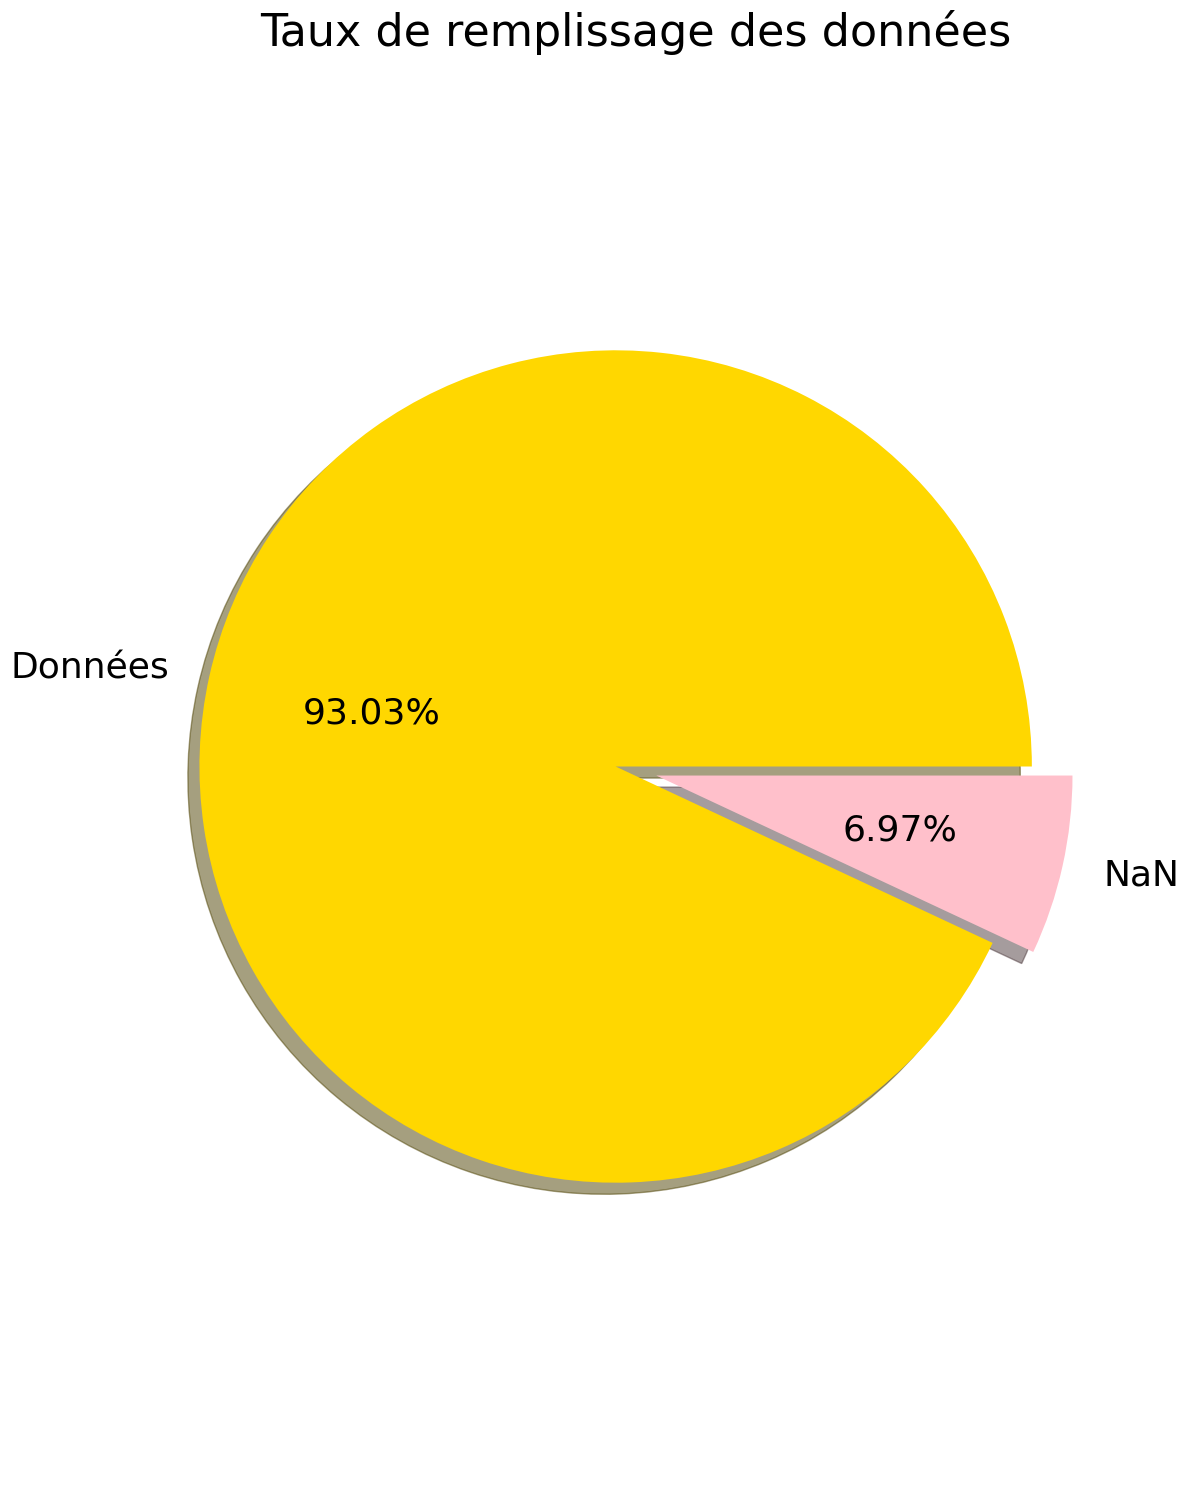

None


In [10]:
print(pie_NaN_visualization(data, (12,15)))

In [56]:
nb_data = data.count().sum()
colonnes = data.shape[1]
lignes = data.shape[0]

print(nb_data)
print(colonnes)

12496
15


In [57]:
nb_total = (colonnes*lignes)
rate